# (a): By computing normalization, do they mean the integral of |psi|^2?
# (b) When getting psi_0 analytically, the normalization integral is constant in t, but slightly less than 0 (because Gaussian cuts off). Is this fine, or should I use the computed quantity?
# (d) Do they mean x_0 instead of x_1 in the double potential well formula?
# omega is too big to see any change in psi chart...
# Hamiltonian equation looks off (domain not matching up)

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.eye(4)
b = [1,2,3,4]
np.linalg.solve(A,b)

array([1., 2., 3., 4.])

In [34]:
# Constants
m = 9.1094e-31     # Mass of electron (kg)
hbar = 1.0546e-34  # Planck's constant over 2*pi (J*s)
P = 500             #number of cells
L = 1e-8          #lengthscale (m)
a = L/P            #length step size (m)
tau = 1e-18       #timestep (s)
sigma = L/25       #gaussian width parameter (m)
k = 500/L          #wavenumber (m^(-1))
x = np.linspace(-L/2, L/2, P-1) #spatial domain
x0 = L/5 #gaussian is centered about x0 (s)
omega = 3e15       #harmonic oscillator frequency (s^(-1))
V0 = 6e-17         #reference potential (J)

#Potential Functions:
def V1(x): #square well
    return 0

def V2(x): #harmonic oscillator
    return (1/2)*m*omega**2 * x**2

def V3(x): #double well
    return V0*(x**2 / x0**2 - 1)**2

#create and populate discretized Hamiltonian:
V = V1 #use square potential
H = np.zeros([P-1,P-1]) 
A = -(hbar**2)/(2*m*a**2)
Sup = A*np.eye(P-1,k=1) #A on 1st super-diagonal
Sub = A*np.eye(P-1,k=-1) #A on 1st sub-diagonal
for i in range(1,P):
    H[i-1,i-1] = V(i*a - L/2) - 2*A #B elements along diagonal
H = H + Sup + Sub
        
#L, R matrices:
Lm = np.eye(P-1) + (1j)*(tau/(2*hbar))*H
Rm = np.eye(P-1) - (1j)*(tau/(2*hbar))*H
    
#initial wavefunction
psi0 = 1/(np.sqrt(sigma * np.sqrt(2*np.pi))) #normalization constant
psi = psi0*np.exp(-(x-x0)**2 / (4*sigma**2) + (1j)*k*x)

In [64]:
k/10**10

0.5

In [33]:
np.eye(5, k=-1)

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [126]:
psi0

9986.769753046186

In [127]:
np.sum(psi*np.conj(psi))*a

(0.995999999999974+0j)

In [128]:
np.sum(np.conj(psi)*psi)*a

(0.995999999999974+0j)

In [7]:
def X_exp(psi): #get expected position
    return np.sum(np.conj(psi)*x*psi)*a

def E(psi): #get energy
    return np.sum(np.dot(np.dot(np.conj(psi), H), psi))*a

def norm(psi): #get normalization
    return np.sum(np.conj(psi)*psi)*a

In [130]:
N = 3000 #number of time steps
psi_list = [] #storing time seperated absolute wavefunction profiles
X_list = [] #store expected position
E_list = [] #store energy
N_list = [] #store normalization

#running the Crank-Nicolson Method:
for i in range(N):
    
    if(i%100==0):
        psi_list.append(psi*np.conj(psi))
    
    v = np.dot(Rm,psi)
    psi = np.linalg.solve(Lm, v)
    
    X_list.append(X_exp(psi))
    E_list.append(E(psi))
    N_list.append(norm(psi))

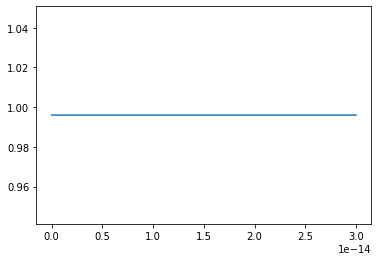

In [131]:
t = np.linspace(0,N*tau,N)
plt.plot(t, np.real(np.round_(N_list, 10)))


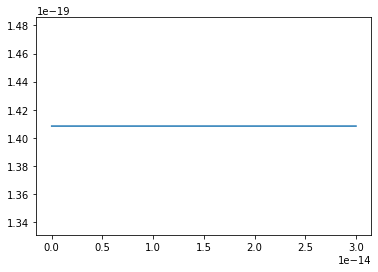

In [132]:
plt.plot(t, np.real(np.round_(E_list, 30)))

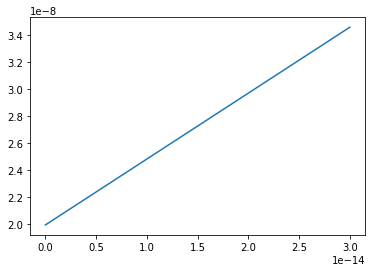

In [133]:
plt.plot(t, np.real(np.round_(X_list, 12)))

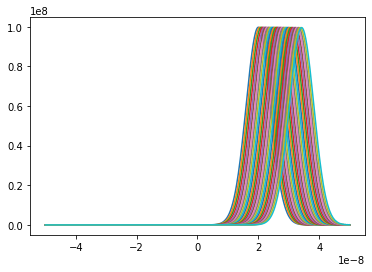

In [134]:
for i in range(len(psi_list)):
    plt.plot(x,psi_list[i])

C:\Users\andre\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


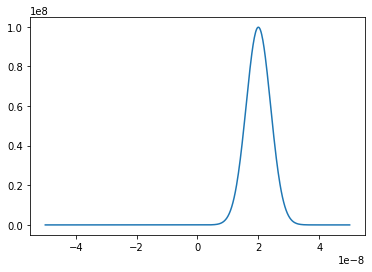

In [35]:
plt.plot(x,psi*np.conj(psi))

In [166]:
# Constants
m = 9.1094e-31     # Mass of electron (kg)
hbar = 1.0546e-34  # Planck's constant over 2*pi (J*s)
P = 500             #number of cells
L = 1e-8          #lengthscale (m)
a = L/P            #length step size (m)
tau = 1e-18       #timestep (s)
sigma = L/25       #gaussian width parameter (m)
k = 500/L          #wavenumber (m^(-1))
x = np.linspace(-L/2, L/2, P-1) #spatial domain
x0 = L/5 #gaussian is centered about x0 (s)
omega = 3e15       #harmonic oscillator frequency (s^(-1))
V0 = 6e-17         #reference potential (J)

#Potential Functions:
def V1(x): #square well
    return 0

def V2(x): #harmonic oscillator
    return (1/2)*m*omega**2 * x**2

def V3(x): #double well
    return V0*(x**2 / x0**2 - 1)**2

#create and populate discretized Hamiltonian:
V = V2 #use square potential
H = np.zeros([P-1,P-1]) 
A = -(hbar**2)/(2*m*a**2)
Sup = A*np.eye(P-1,k=1) #A on 1st super-diagonal
Sub = A*np.eye(P-1,k=-1) #A on 1st sub-diagonal
for i in range(1,P):
    H[i-1,i-1] = V(i*a - L/2) - 2*A #B elements along diagonal
H = H + Sup + Sub
        
#L, R matrices:
Lm = np.eye(P-1) + (1j)*(tau/(2*hbar))*H
Rm = np.eye(P-1) - (1j)*(tau/(2*hbar))*H
    
#initial wavefunction
psi0 = 1/(np.sqrt(sigma * np.sqrt(2*np.pi))) #normalization constant
psi = psi0*np.exp(-(x-x0)**2 / (4*sigma**2) + (1j)*k*x)

In [167]:
print(Lm[-3:,-3:])


[[1.+0.6189971j  0.-0.07235658j 0.+0.j        ]
 [0.-0.07235658j 1.+0.62284523j 0.-0.07235658j]
 [0.+0.j         0.-0.07235658j 1.+0.6267089j ]]


In [170]:
N = 100 #number of time steps
psi_list = [] #storing time seperated absolute wavefunction profiles
X_list = [] #store expected position
E_list = [] #store energy
N_list = [] #store normalization

#running the Crank-Nicolson Method:
for i in range(4000):
    
    
    psi_list.append(psi*np.conj(psi))
    
    v = np.dot(Rm,psi)
    psi = np.linalg.solve(Lm, v)
    
    X_list.append(X_exp(psi))
    E_list.append(E(psi))
    N_list.append(norm(psi))

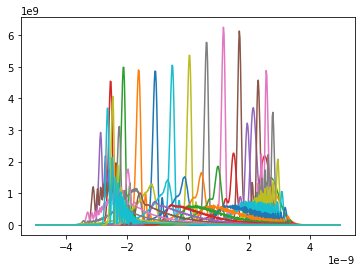

In [176]:
for i in range(40):
    plt.plot(x,psi_list[100*i])

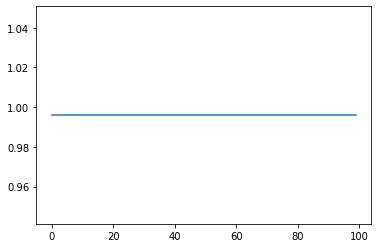

In [157]:
t = np.linspace(0,N*tau,N)
plt.plot(np.real(np.round_(N_list, 10)))

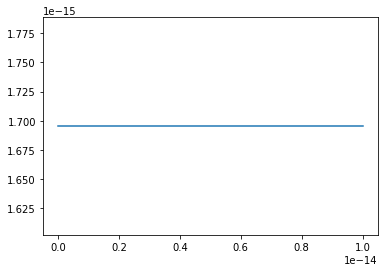

In [25]:
plt.plot(t, np.real(np.round_(E_list, 20)))

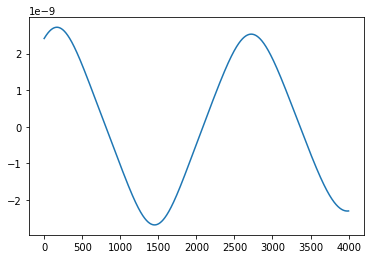

In [172]:
plt.plot(np.real(np.round_(X_list, 20)))
#plt.xlabel("x")
#plt.title(r"<X>(t)")
#plt.savefig("X.pdf")

In [9]:
X_list

[(1.9960940825550855e-08-2.9077779196901703e-26j),
 (1.9960942473492652e-08+1.0806467517874253e-25j)]

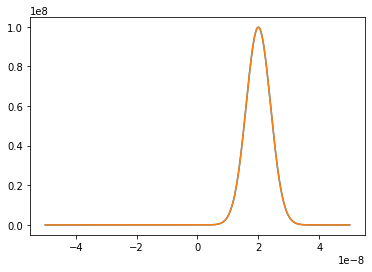

In [16]:
for i in range(len(psi_list)):
    plt.plot(x,psi_list[i])
#plt.xlabel("x")
#plt.title(r"$|\psi|^2$")
#plt.savefig("psi.pdf")

In [17]:
len(psi_list)

2

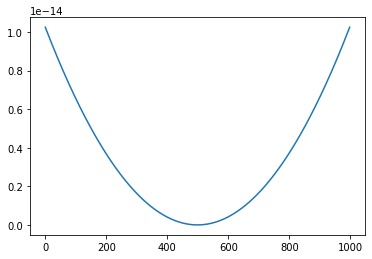

In [154]:
plt.plot(V2(x))

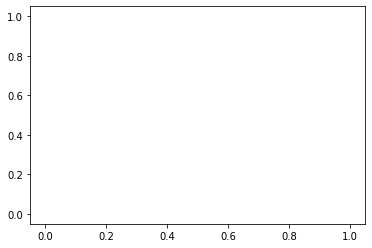

In [123]:
d = []
for i in range(len(H)):
    d.append(H[i,i])
plt.plot(d[100:-100])